# Machine Learning

Conceitos:
Aprendizado supervisionado: classificação (dados discretos) e regressão (dados contínuos)

As maneiras de obter os dados para classificação (categorias explícitas) são através de conhecimento humano. O trabalho de se classificar tais dados dependerá do problema a ser resolvido.

Fonte de tais dados: 

Amazon Mechanical Turk - https://www.mturk.com/

Crowd Flower - https://www.crowdflower.com/plans/

Para categorias implícitas, dependerá do problema. Alguns sites de busca podem interpretar um acesso e uma saída breve do site como um site não relevante a aquele assunto.

Aprendizado não supervisionado: clusterização e encontro de outliers;

**WORKFLOW BÁSICO DE MACHINE LEARNING** - Representação, Avaliação e Otimização

Representação – Qual é o problema a ser resolvido e quais são as características daquilo que você quer representar/resolver de uma forma que o computador "entenda".
Exemplo: reconhecimento de imagem. Imagens podem ser representadas pelos pixeis; a imagem pode conter metadata. A imagem pode ser classificada por um aplicativo em rede neural, etcs;

Avaliação – É a representação de o quanto o seu modelo está bom. Em um problema de classificação, um bom modelo é aquele que consegue classificar corretamente em um maior período de tempo;

Otimização – Conseguir obter o melhor resultado para a classificação, seja ela com um algoritimo específicou, seja através de alterações dos critérios do aplicativo.


## Sobre KNN

O **K Nearet Neighbors** é um algoritimo que classifica a partir dos pontos mais próximos, onde **k** é a distancia entre **k** vizinhos que definirá a classe da observação testada.
A **borda de decisão** é onde separa as "vizinhanças" da classificação.

As características do K-nn são:
* Criar a métrica para definição de distância. A métrica será definida de acordo com o problema
* Quantos vizinhos são necessários para definir a observação
* Um peso opcional para a definição
* Método de agregação dos pontos

## Termos

* Representação de características - é como passamos os dados para o computador poder entender o problema a ser resolvido
* Em um aprendizado supervisionado, passamos para o computador as características (X) e os resultados (y) para criar o modelo.
* Os dados X serão divididos entre os dados de treino e os dados de teste, sendo, na maioria dos casos, a proporção 75%/25%.
* Após passarmos os dados X, teremos um modelo
* A fase de treino é para estimar o quanto seu modelo consegue generalizar sobre dados ainda não observados

## Regressão e Classificação

* O modelo de regressão é usado para retornar um valor contínuo, já o modelo de classificação é usado para retornar um valor discreto;
* Os modelos de classificação podem ser binários (0 ou 1), multiclasse (Laranja, Banana, Maçã) ou multirótulo (0,5 ciência, 0,03 história...) 
* Muitos dos modelos possuem os dois tipos (regressão e classificação)
* x = Variáveis independentes (características)
* y = Variáveis dependentes (valor alvo)

# Generalização, Overfitting and Undetfitting

* Generalização é a capacidade do algoritimo de classificar com precisão novas observações a partir dos dados de treino
* Assumimos que os dados de teste terão as mesmas características dos dados de treino;
* Modelos que possuam um bom resultado com os dados de teste tendem a ter bons resultados nos dados de treino
    * Esse resultado pode não ocorrer caso o modelo fique muito específico para os dados de teste.

## Criando datasets

É possível criar alguns datasets usando algumas funções do ***sklearn***.

Criando um dataset linear


In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

X_R1, X_R2 = make_regression(n_samples = 100, n_features = 1, n_informative = 1, bias = 150, noise = 30, random_state = 0)
plt.scatter(X_R1, X_R2, marker = "o", s = 50)
plt.show()

## K-Nearest Neighbors

O K-Nearest pode ser usado tanto para classificação quanto para regressão.

Na variação de classificação, o algoritimo classifica determinada observação de acordo com a quantidade de outras observações em volta. Caso o valor de K seja 1, a classificação será, a parte dos testes, a própria observação, isso leva ao overfitting do modelo. Quanto maior a quantidade de K, mais o modelo consegue generalizar (levando em conta que esse "mais" tem um limite. Após isso teremos um underfitting).

Na variação de regressão verificamos quais sãos os valores de treino mais próximos e criamos uma "linha de predição". Quanto menor a quantidade de K, maior é a variação do modelo, podendo ter grandes alterações em caso de outliers. Caso a quantidade de K seja maior que um, será feito uma média das distâncias entre o novo valor observado e as observações de treino.


### Criando o modelo de regressão

In [1]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt

X_R1, X_R2 = make_regression(n_samples = 100, n_features = 1, n_informative = 1, bias = 150, noise = 30, random_state = 0)

X_train, X_test, y_train, y_test = train_test_split(X_R1, X_R2, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)
print(knnreg.predict(X_test))
print("R-squared test score {:.3f}".format(knnreg.score(X_test, y_test)))

[ 231.70974697  148.35572605  150.58852659  150.58852659   72.14859259
  166.50590948  141.90634426  235.57098756  208.25897836  102.10462746
  191.31852674  134.50044902  228.32181403  148.35572605  159.16911306
  113.46875166  144.03646012  199.23189853  143.19242433  166.50590948
  231.70974697  208.25897836  128.01545355  123.14247619  141.90634426]
R-squared test score 0.425


### Demonstração dos modelos

<IPython.core.display.Javascript object>


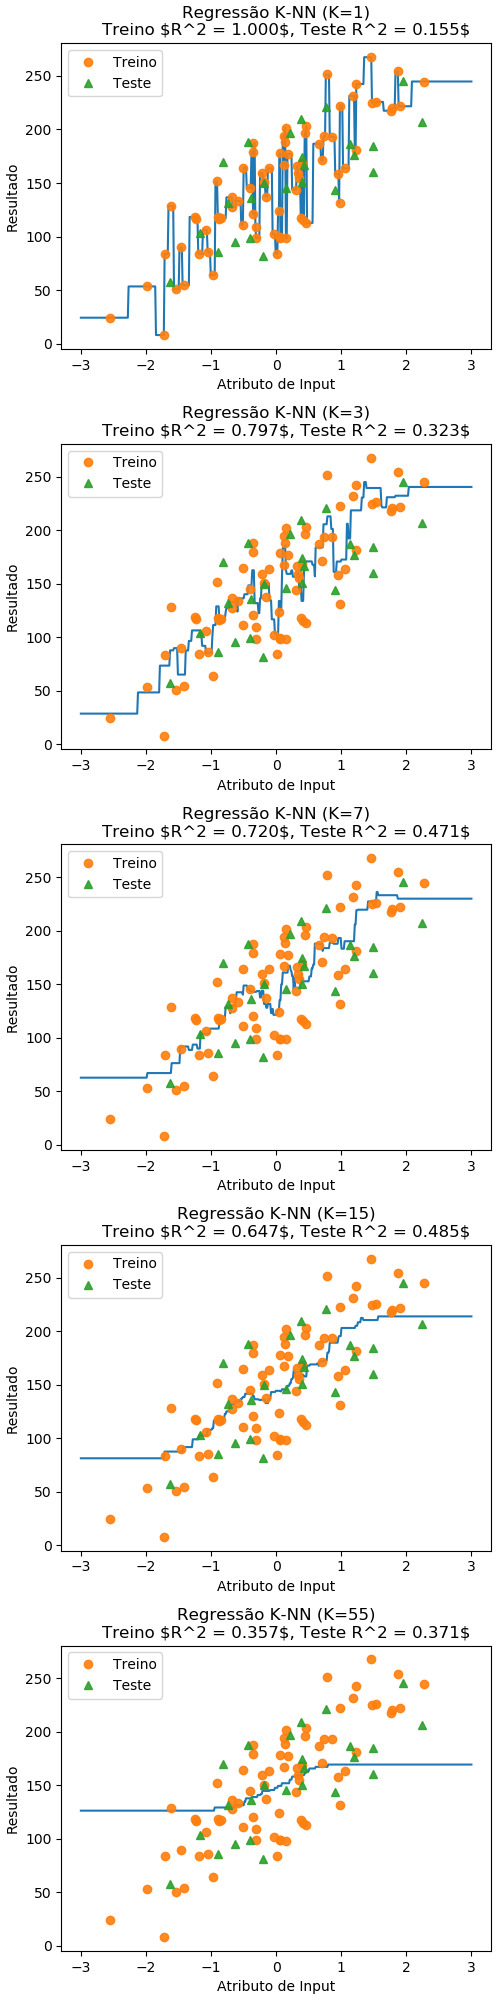

In [2]:
%matplotlib notebook
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap


# Dados de regressão
X_R1, y_R1 = make_regression(n_samples = 100, n_features = 1, n_informative = 1, bias = 150, noise = 30, random_state = 0)

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

fig, subaxes = plt.subplots(5,1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label="Treino")
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label="Teste")
    thisaxis.set_xlabel("Atributo de Input")
    thisaxis.set_ylabel("Resultado")
    thisaxis.set_title("Regressão K-NN (K={})\n\
    Treino $R^2 = {:.3f}$, Teste R^2 = {:.3f}$".format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
   # plt.show()

## Modelos lineares

Modelos lineares conseguem criar um modelo linear (ou seja, uma linha reta) onde podem predizer determinado valor (y) a partir de um valor de entrada (x). Os resultados e os valores de entrada têm que ser contínuos (numéricos).

A fórmula de resultado é: y = w0x0 + b, onde o **w** é o valor que o **x** irá multiplicar e o **b** é onde a nossa linha irá começar.

O **w** é o valor que irá ser concedido pelo modelo e o **b** é, além de como explicado acima (onde a linha começa), tenta simplificar outros fatores que podem influenciar no modelo e que não estão nas características dos dados ou representados no modelo em si.

Um exemplo simples é **Quatidade de vitórias que um jogador de Counter Strike obteve, dada a quantidade de horas que aquele jogador jogou**. 

### Nomenclaturas

$$ \hat{y} = \hat{w_0}x_1 + \hat{b}$$

**y^** = resultado da predição

**wx** = coeficientes do modelo

**b^** = constante de viés (intercecção do modelo)

## Avaliação do modelo

Podemos usar o **Least-squares Linear Regression**, que nada mais é que a média da soma dos quadrados da diferença entre o valor predito e o valor original.

$$ \frac{1}{n} \sum_{i=1}^n(y_i - \hat{y_i})^2 $$

O objetivo do cálculo é obter o menor valor sobre o modelo criado. Isso quer dizer que, quanto menor o valor, melhor é a generalização do modelo. Este cálculo é realizado na **fase de treino**.

Já o **RSS** é usado na **fase de teste**, onde ele funciona como uma "penalidade" para o modelo. O cálculo é:

$$ RSS(w,b) = \sum_{i=1}^n (y_i = (w_i * x_i + b)^ 2) $$

Não se impressione pelo cálculo, pois nada mais é que um **Least-squares** sem a média (1/n), onde o segundo parênteses é o resultado do modelo.

Observe que o **y** deste último cálculo é o **y** dos dados de **treino**.

## Criando um modelo de Regressão Linear

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Dados de regressão
X_R1, y_R1 = make_regression(n_samples = 100, n_features = 1, n_informative = 1, bias = 150, noise = 30, random_state = 0)

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

linreg = LinearRegression().fit(X_train, y_train)

print("Coeficiente linear (w): {}".format(linreg.coef_))
print("Intercecção do Modelo Linear: {:.3f}".format(linreg.intercept_))
print("Pontuação R-Squared (treino): {:.3f}".format(linreg.score(X_train, y_train)))
print("Pontuação R-Squared (teste): {:.3f}".format(linreg.score(X_test, y_test)))

Coeficiente linear (w): [ 45.70870465]
Intercecção do Modelo Linear: 148.446
Pontuação R-Squared (treino): 0.679
Pontuação R-Squared (teste): 0.492


<IPython.core.display.Javascript object>


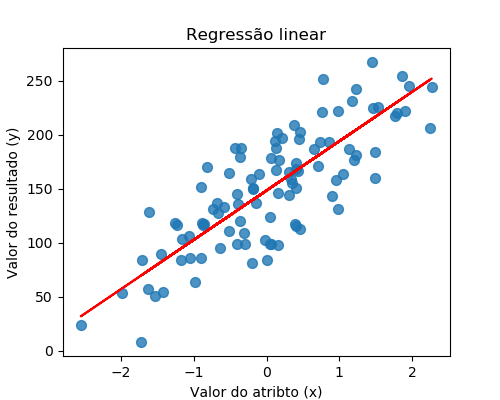

In [5]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= "o", s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, "r-")
plt.title("Regressão linear")
plt.xlabel("Valor do atribto (x)")
plt.ylabel("Valor do resultado (y)")

## Ridge Regression

É uma forma de regularização de dados, também conhecida como **regularização L2**, serve para que o modelo tenha uma certa punição caso tenha valores que sejam muito grandes. O modelo é:
$$ RSS_{RIDGE}(w, b) = \sum_{i=1}^n (y_i - (w * x_i + b))^2 + \alpha \sum_{j=1}^p w_j^2 $$

O **ridge** é usado na fase de **treino** do modelo. Isso quer dizer que podem haver dois modelos que tenham a primeira parte como mesmo resultado, mas o **ridge** irá escolher o modelo com o menor valor de penalização. 

Como o valor do peso (***w***) é elevado ao quadrado, pesos com valores maiores serão mais impactados pelo cálculo, afinal 10 ^ 2 = 100, já 1.000 ^2 = 1.000.000.

A regularização é controlada pelo **alfa** do cálculo. Quanto maior o alfa, maior é a regularização via "punição" de valores mais altos.

O **ridge** pesa mais para modelos com grande quantidade de atributs. Ou seja, em um modelo simples (um **w**) o **ridge** é quase facultativo, mas para modelos com dezenas, centenas ou milhares de atributos, o **ridge** pode ser uma boa opção.

In [3]:
# Criando um modelo ridge
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1)

linridge = Ridge(alpha = 20.0).fit(X_train, y_train)
print("Dados")
print("Intercecção do modelo: {}".format(linridge.intercept_))
print("Coeficiente do modelo: {}".format(linridge.coef_))
print("Resultado R-quadrado (treino): {}".format(linridge.score(X_train, y_train)))
print("Resultado R-quadrado (teste): {}".format(linridge.score(X_test, y_test)))


Dados
Intercecção do modelo: 147.56657672794432
Coeficiente do modelo: [ 35.93508042]
Resultado R-quadrado (treino): 0.6718827201760833
Resultado R-quadrado (teste): 0.4389954740816211


Caso os valores estejam em escalas diferentes, o ridge irá ser aplicado de forma desigual. Em alguns casos a melhor coisa a se fazer é normalizar os dados, ou seja, criar uma escala onde (no caso do exemplo) os dados estejam em uma escala de 0 a 1.

In [ ]:
# Aplicando o preprocessamento dos dados

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = Ridge().fit(X_train_scaled, y_train)
r2_score = clf.score(X_test_scaled, y_test)

# Podemos também já ajustar os dados logo de começo
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

Alguns pontos sobre a normalização dos dados:

* A normalização deve ser treinada com os dados de **treino**, pois pode haver o risco de **vazamento de dados** (data leakage);
* A normalização deve ser feita, após o treino, nos dados de teste e nos dados de treino **com a mesma escala**. Pode ocorrer erros caso faça com escalas diferentes;

A **normalização** é melhor em casos em que há poucas observações e muitos atributos nos dados. Quanto maior a quantidade de dados e observações, menor é a necessidade de uma regularização dos dados.


## Lasso Regresion

A **regressão Lasso** é procura minimizar os coeficentes para zero. Vejamos a fórmula:

$$ RSS_{LASSO}(w,b) = \sum_{i=1}^N (y - (w * x_i + b))^2 + \alpha \sum_{j=1} ^ p |w| $$

A **regressão Lasso**, como soma os pesos em seu valor absluto, "força" os pesos para 0 (dados esparços), pois quanto menor o valor dos pesos, menor é a punição para o modelo. Isso é útil para quando o modelo possui alguns atributos que possuam valores muito diferentes e você quer forçar (e não se importa) que o modelo seja esparço. O **Lasso** também ajuda a destacar os atributos do modelo que possuam a maior iteração, ou seja, que sejam mais importantes para o modelo.

### Quando usar Ridge ou Lasso

* Várias variáveis que não possuem valores tão díspares entre elas - **Ridge**
* Algumas variáves com valores muito diferente entre elas - **Lasso**

## Leitura do resultado do Lasso

Quando verificamos os valores, temos que interpretar como a influência que cada variável possui no modelo (se a correlação é positiva ou negativa), ou seja, valores que originalmente são porcentagens irão aparecer com escalas totalmente diferentes.

## Least-Squares Polynomial Regression

Para podermos ter iterações que uma simples regressão linear não consegue obter, podemos usar de polinômios. 

Podemos usar de polinômios também para criarmos melhores classificações. O cuidado que temos que ter é que, dependendo do grau de polinômios que indicamos, o modelo pode ter overfitting. Uma regularização, tal como um **ridge** pode ajudar a resolver esse problema.

Os dados de polinômios são criados para gerar os dados que serão usados para criar os modelos, não os modelos em si.

## Logistic Regression

Usado para problemas de classificação, onde há o cálculo para gerar os pesos e, com o resultado, será usado como potência do log, assim teremos valores entre 0 e 1 e, graças a isso, podemos gerar resultados de classificação.

## Suport Vector Machines

É uma função linear que interpreta os dados como se estivessem em um vetor. A função cria uma linha de decisão que, dependendo de onde o ponto estiver neste "vetor", será classificado de uma determinada forma.

A função é ajustada pelo espaço de decisão, que é o espaço entre os dois pontos que a função pode estar entre os pontos a serem classificados.


## Multiclassificação

Em problemas ode temos que classificar mais de uma classe, o scikit transforma n problemas de multiclassificação em n problemas de classificação binária. Ou seja, como dito no vídeo, há a classificação entre laranjas e não-laranjas, maçãs e não-maçãs e assim por diante.